
# Install Libraries

In [ ]:
!pip3 install numpy

In [80]:
!python3 -m pip install -U scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 41.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 47.2 MB/s eta 0:00:0000:0100:01


In [47]:
!pip3 install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.3/772.3 kB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 13.4 MB/s eta 0:00:00


In [3]:
!pip3 install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 21.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 21.5 MB/s eta 0:00:00


In [73]:
!pip3 install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 47.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 68.0 MB/s eta 0:00:00:00:01


In [83]:
!pip3 install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 5.4 MB/s eta 0:00:00a 0:00:01


# Import libraries

In [1]:
import pandas as pd
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from nltk.corpus import stopwords


from sklearn.feature_extraction.text import CountVectorizer

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /u/camilleh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True


# Watson Toxic 200 En Dataset

In [72]:
toxic_200_test = pd.read_json('raw_data/commercial-use-allowed/en/toxic200_en/test.json')
toxic_200_train = pd.read_json('raw_data/commercial-use-allowed/en/toxic200_en/train.json')
toxic_200_val = pd.read_json('raw_data/commercial-use-allowed/en/toxic200_en/val.json')


In [73]:
t200_train = pd.json_normalize(toxic_200_train['data'])

In [74]:
t200_train['version'] = toxic_200_train['version']

In [75]:
t200_train

,text,label,version
0,‘I’m responsible for what happens to you!’ she...,1,en
1,case you have doubts regarding a specific vend...,0,en
2,I look at the second guy. He gives me this bla...,0,en
3,Did you know that the Women's Success Summit w...,0,en
4,"Are you looking for a tissue? Good, that shoul...",1,en
...,...,...,...
7995,Ok so I’ve just discovered making smoothies wi...,1,en
7996,Before the accession of Cyprus to EU the Cypru...,1,en
7997,While doing these reps you want to keep that g...,1,en
7998,While the variations above will help you get s...,0,en


In [76]:
t200_train['word_count'] = t200_train['text'].apply(lambda x: len(str(x).split()))

In [77]:
t200_train['version'].value_counts()

version
en    8000
Name: count, dtype: int64

In [81]:
t200_train['word_count'].mode()

0    13
Name: word_count, dtype: int64

In [82]:
t200_train.drop_duplicates()

,text,label,version,word_count
0,‘I’m responsible for what happens to you!’ she...,1,en,21
1,case you have doubts regarding a specific vend...,0,en,20
2,I look at the second guy. He gives me this bla...,0,en,12
3,Did you know that the Women's Success Summit w...,0,en,27
4,"Are you looking for a tissue? Good, that shoul...",1,en,20
...,...,...,...,...
7995,Ok so I’ve just discovered making smoothies wi...,1,en,19
7996,Before the accession of Cyprus to EU the Cypru...,1,en,19
7997,While doing these reps you want to keep that g...,1,en,26
7998,While the variations above will help you get s...,0,en,26


In [84]:
178/8000

0.02225

In [85]:
t200_train.pivot_table(index=['text'], aggfunc='size')


text
!! Beware of Tokens of eternity aka Keepsake Co. Now!!I think I've had enough of being treated like a fool when given...                             1
" A really good and surprising look at what our navy can do. I really enjoyed this book, even if it came off a little like propaganda at times. "    1
" I am no fan of Churchill, and could right endless stories of what a bastard he was "                                                               1
"'Cause you guys, NYPD, you're blameless, right? I mean, you guys never get shit wrong. You ever serve, Sergeant?"                                   1
"...In the old day' things were so different, bosses watched our asses, the elders of the CPD had your back with sound advise."                      1
                                                                                                                                                    ..
← Week in Review: 16 February- 22 February 2015                                          

In [13]:
# words0 = t200_train[t200_train['label']==0]['text']
# from collections import Counter
non_toxic_mc = Counter(" ".join(t200_train[t200_train['label']==0]["text"]).split()).most_common(25)

NameError: name 't200_train' is not defined

In [98]:
words0

1       case you have doubts regarding a specific vend...
2       I look at the second guy. He gives me this bla...
3       Did you know that the Women's Success Summit w...
7       We have been granted a patent for a method of ...
9                      9) A keystone species is one that:
                              ...                        
7987    1) In battle, will you be able to have greater...
7990    [0068] The remote control can comprise one but...
7992    While Matthew, Mark and Luke all say the Last ...
7993    You can choose your delivery date on the Cart ...
7998    While the variations above will help you get s...
Name: text, Length: 4006, dtype: object

In [3]:
from nltk.corpus import stopwords

In [4]:
def clean(review):
    
    review = review.lower()
    review = re.sub('[^a-z A-Z 0-9-]+', '', review)
    review = " ".join([word for word in review.split() if word not in stopwords.words('english')])
    
    
    return review


In [136]:
t200_train['text_clean'] = t200_train['text'].apply(clean)

In [137]:
t200_train

,text,label,version,word_count,text_clean
0,‘I’m responsible for what happens to you!’ she...,1,en,21,im responsible happens yelled christ im workin...
1,case you have doubts regarding a specific vend...,0,en,20,case doubts regarding specific vendor telephon...
2,I look at the second guy. He gives me this bla...,0,en,12,look second guy gives blank stare
3,Did you know that the Women's Success Summit w...,0,en,27,know womens success summit also listed one top...
4,"Are you looking for a tissue? Good, that shoul...",1,en,20,looking tissue good hold resume bitching
...,...,...,...,...,...
7995,Ok so I’ve just discovered making smoothies wi...,1,en,19,ok ive discovered making smoothies ice rather ...
7996,Before the accession of Cyprus to EU the Cypru...,1,en,19,accession cyprus eu cyprus courts jurisdiction...
7997,While doing these reps you want to keep that g...,1,en,26,reps want keep glute muscle isolated put hand ...
7998,While the variations above will help you get s...,0,en,26,variations help get started climbing locomotio...


In [139]:
my_counter =Counter(" ".join(t200_train[t200_train['label']==0]["text_clean"]).lower().split())

In [140]:
my_counter.most_common(25)

[('one', 208),
 ('get', 158),
 ('time', 146),
 ('like', 140),
 ('know', 125),
 ('us', 123),
 ('see', 110),
 ('new', 108),
 ('would', 107),
 ('-', 105),
 ('people', 101),
 ('make', 101),
 ('well', 97),
 ('said', 97),
 ('work', 95),
 ('dont', 95),
 ('also', 92),
 ('good', 92),
 ('want', 89),
 ('great', 87),
 ('may', 85),
 ('first', 85),
 ('need', 82),
 ('love', 82),
 ('take', 82)]

In [141]:
mycounter_1=Counter(" ".join(t200_train[t200_train['label']==1]["text_clean"]).lower().split())

In [142]:
my_counter_overall =Counter(" ".join(t200_train["text_clean"]).lower().split())

In [64]:
for sword in stop_words:
    del mycounter_1[sword]

In [67]:
mycounter_1.most_common(25)

[('like', 363),
 ('fuck', 283),
 ('get', 259),
 ('fucking', 240),
 ('shit', 237),
 ('stupid', 202),
 ('one', 193),
 ('would', 184),
 ('ass', 160),
 ('people', 158),
 ('know', 150),
 ('think', 133),
 ("i'm", 131),
 ('want', 128),
 ('make', 128),
 ('going', 119),
 ('love', 116),
 ('good', 115),
 ('really', 115),
 ('it.', 113),
 ('time', 107),
 ('could', 101),
 ('don’t', 98),
 ('see', 96),
 ('way', 95)]

In [70]:
mycounter2=Counter(" ".join(t200_train["text"]).lower().split())
for sword in stop_words:
    del mycounter2[sword]
    
    
mycounter2.most_common(25)

[('like', 492),
 ('get', 415),
 ('one', 384),
 ('would', 288),
 ('fuck', 284),
 ('know', 256),
 ('people', 243),
 ('fucking', 240),
 ('shit', 237),
 ('make', 227),
 ('time', 212),
 ('want', 209),
 ('stupid', 202),
 ('see', 200),
 ('good', 198),
 ('think', 192),
 ('love', 191),
 ("i'm", 177),
 ('-', 173),
 ('it.', 169),
 ('really', 168),
 ('could', 167),
 ('ass', 160),
 ('way', 159),
 ('going', 157)]

In [89]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(t200_train[t200_train['label']==0]["text"])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]


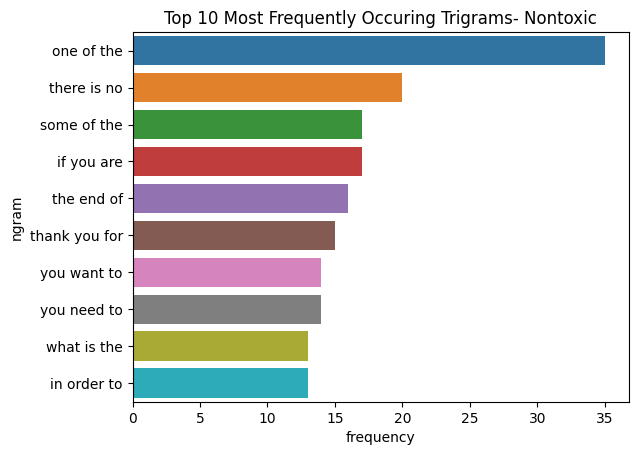

In [90]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams- Nontoxic')
plt.show()

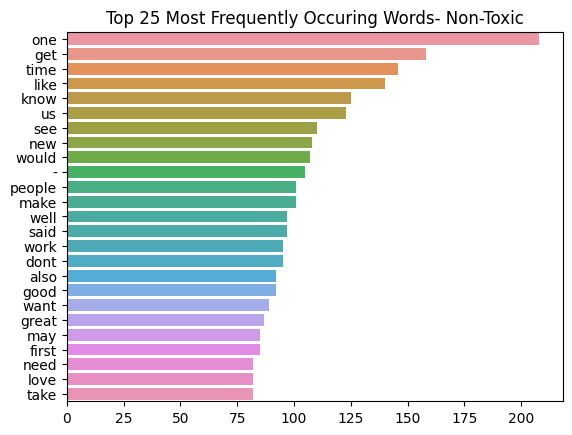

In [147]:
words = []
freq = []

for word, count in my_counter.most_common(25):
    words.append(word)
    freq.append(count)
sns.barplot(x=freq, y=words)
plt.title('Top 25 Most Frequently Occuring Words- Non-Toxic')
plt.show()

In [129]:
mycounter_1.most_common(25)

[('like', 363),
 ('fuck', 283),
 ('get', 259),
 ('fucking', 240),
 ('shit', 237),
 ('stupid', 202),
 ('one', 193),
 ('would', 184),
 ('ass', 160),
 ('people', 158),
 ('know', 150),
 ('think', 133),
 ("i'm", 131),
 ('want', 128),
 ('make', 128),
 ('going', 119),
 ('love', 116),
 ('good', 115),
 ('really', 115),
 ('it.', 113),
 ('time', 107),
 ('could', 101),
 ('don’t', 98),
 ('see', 96),
 ('way', 95)]

In [209]:
t200_train['word_count'].min()

3

# Jigsaw Dataset

In [5]:
jigsaw_train = pd.read_json('raw_data/commercial-use-allowed/en/English_jigsaw/train_YC.json')


In [7]:
js_train = pd.json_normalize(jigsaw_train['data'])

In [151]:
js_train

,text,label
0,That's right. They are not normal. And I am st...,1
1,Only a fool would believe that the MSM is not ...,1
2,because the Oregon state school board is compr...,1
3,"yep, this crap sounds like its from a libertarian",1
4,IRT Marilyn what a completely stupid letter ab...,1
...,...,...
1323728,He called her “daughter” and she referred to M...,1
1323729,"Her ""taxed"" feminism still does not brush away...",1
1323730,Get your head out of your s. NADA you just des...,1
1323731,"Why, because he was a white guy running for th...",1


In [8]:
js_train['word_count'] = js_train['text'].apply(lambda x: len(str(x).split()))

In [91]:
6748/89995

0.0749819434413023

In [152]:
js_train['label'].value_counts()

label
0    1265059
1      58674
Name: count, dtype: int64

In [12]:
js_train['word_count'].mode()

0    10
Name: word_count, dtype: int64

In [15]:
js_train[js_train['word_count']<1]

,text,label,word_count
368255,,0,0


In [163]:
1265059/1323733

0.9556753514492726

In [176]:
js_train['text'] = js_train['text'].str.lower()
js_train['text']= js_train['text'].str.replace('[^\w\s]','')


In [178]:
# js_0_word_count =Counter(" ".join(js_train[js_train['label']==0]['text'].split()))
# js_1_word_count =Counter(" ".join(js_train[js_train['label']==1]["text"].lower().split()))
# js_word_count =Counter(" ".join(js_train["text"].lower().split()))
js_0_word_count=Counter(" ".join(js_train[js_train['label']==0]["text"]).split())

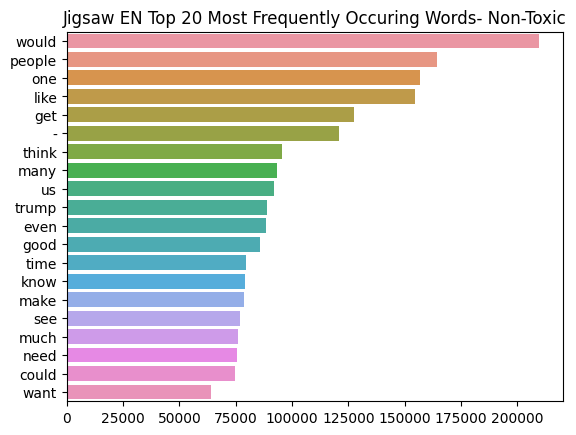

In [191]:
# js_0_word_count=Counter(" ".join(js_train[js_train['label']==0]["text"]).split())

words = []
freq = []

for word, count in js_0_word_count.most_common(100):
    if word not in stopwords.words('english'):
        words.append(word)
        freq.append(count)
sns.barplot(x=freq, y=words)
plt.title('Jigsaw EN Top 20 Most Frequently Occuring Words- Non-Toxic')
plt.show()

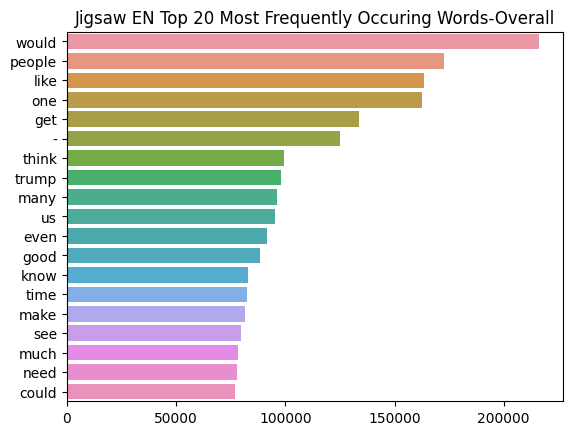

In [196]:
js_overall_word_count=Counter(" ".join(js_train["text"]).split())
words = []
freq = []

for word, count in js_overall_word_count.most_common(97):
    if word not in stopwords.words('english'):
        words.append(word)
        freq.append(count)
sns.barplot(x=freq, y=words)
plt.title('Jigsaw EN Top 20 Most Frequently Occuring Words-Overall')
plt.show()

In [ ]:
js_train.head()

In [237]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(js_train[js_train['label']==0]["text"])
count_values = trigrams.toarray().sum(axis=0)# toarray() before sum() causes memory error
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]


IndexError: index 14230138 is out of bounds for axis 0 with size 1

In [ ]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams- Nontoxic')
plt.show()

In [199]:
!pip3 install datatable


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 MB 25.2 MB/s eta 0:00:0000:0100:01


In [200]:
import datatable as dt


In [202]:
jigsaw_train_dt = dt.Frame(js_train)


In [203]:
jigsaw_train_dt

,text,label,word_count
,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪
0,that's right. they are not normal. and i am starti…,1,26
1,only a fool would believe that the msm is not bias…,1,14
2,because the oregon state school board is comprised…,1,32
3,"yep, this crap sounds like its from a libertarian",1,9
4,irt marilyn what a completely stupid letter about …,1,41
5,"""watch people die from taking away their healthcar…",1,19
6,to protest such is meaningless stupidity of the le…,1,77
7,lol really. no offence but that’s an idiotic state…,1,162
8,"stupid is what stupid thinks (and says). cheers, r…",1,10


In [236]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(jigsaw_train_dt[jigsaw_train_dt['label']==0]["text"])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]


TypeError: Column selector must be an integer or a string, not <class 'bool'>

In [235]:
js_train[(js_train['word_count']==1) &(js_train['label']==0)].head(30)

,text,label,word_count
4587,advice,0,1
4699,bingo!!!,0,1
4825,amen!,0,1
4842,"x100,000!!!",0,1
4984,http://www.cruiselawnews.com/2016/12/articles/...,0,1
5006,http://www.ncregister.com/blog/reilly/the-land...,0,1
5079,muricah!!!!1111,0,1
5138,test,0,1
5229,branding_won_out_on_that_issue.,0,1
5236,closet.,0,1


# English Twitter Crowd 80k

In [50]:
twit_crowd_train = pd.read_json('raw_data/commercial-use-allowed/en/English_twitter_crowd80k/test_YC.json')
twit_crowd_train = pd.read_json('raw_data/commercial-use-allowed/en/English_twitter_crowd80k/train_YC.json')
twit_crowd_val = pd.read_json('raw_data/commercial-use-allowed/en/English_twitter_crowd80k/val_YC.json')

In [19]:
twit_crowd_train

,version,data
0,English_twitter_80k,{'text': '#HarryOnCapital is love. #HarryOnCap...
1,English_twitter_80k,"{'text': '@d_a_sausages #lighter nights, bloss..."
2,English_twitter_80k,{'text': 'Nasty stockings lesbians go down htt...
3,English_twitter_80k,{'text': 'Panera took off the BBQ chicken sala...
4,English_twitter_80k,{'text': 'Chelsea fans will be happy about Thi...
...,...,...
89990,English_twitter_80k,{'text': 'If @TabTeamRacing Blue beat @EUSC_sa...
89991,English_twitter_80k,{'text': 'Ion like fucking w ppl FRFR niggas d...
89992,English_twitter_80k,{'text': 'RT @ZhoBabe: because it's easier and...
89993,English_twitter_80k,{'text': '@BitterOldPunk @bellebelle Don't Wor...


In [20]:
crowd_train = pd.json_normalize(twit_crowd_train['data'])

In [85]:
def count_words(data, label, title_str):
    wc=Counter(" ".join(data[data['label']==label]["text_clean"]).split())

    words = []
    freq = []

    for word, count in wc.most_common(20):
        if word not in stopwords.words('english'):
            words.append(word)
            freq.append(count)
    sns.barplot(x=freq, y=words)
    plt.title('Most Frequently Occuring Words- ' + title_str)
    plt.show()

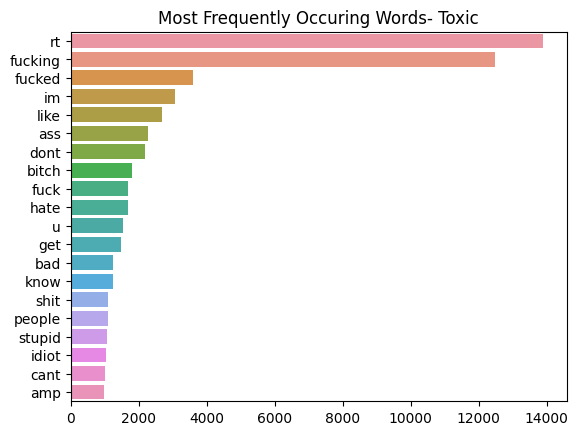

In [27]:
count_words(crowd_train, 1, 'Toxic')

In [31]:
# crowd_train
 
crowd_train['text_clean'] = crowd_train['text'].apply(clean)

KeyboardInterrupt: 

In [22]:
crowd_train['label'].value_counts()

label
0    61092
1    28903
Name: count, dtype: int64

In [33]:
61092/89995

0.6788377132062893

In [81]:
def trigram_counter(data, label, str_label):
    cv1 = CountVectorizer(ngram_range=(3,3))
    trigrams = cv1.fit_transform(data[data['label']==label]["text"])
    count_values = trigrams.toarray().sum(axis=0)
    ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
    ngram_freq.columns = ["frequency", "ngram"]

    sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
    plt.title('Top 10 Most Frequently Occuring Trigrams- ' + str_label)
    plt.show()

In [40]:
crowd_train.drop_duplicates()

,text,label,text_clean
0,#HarryOnCapital is love. #HarryOnCapital is li...,0,harryoncapital love harryoncapital life first ...
1,"@d_a_sausages #lighter nights, blossom and sno...",0,dasausages lighter nights blossom snow drops b...
2,Nasty stockings lesbians go down https://t.co/...,1,nasty stockings lesbians go httpstcozk5dchxjcs
3,Panera took off the BBQ chicken salad off thei...,0,panera took bbq chicken salad menu guess maybe...
4,Chelsea fans will be happy about Thibaut Court...,0,chelsea fans happy thibaut courtois instagram ...
...,...,...,...
89989,@dantdm More Minecraft: Pocket Edition!!!!!! W...,0,dantdm minecraft pocket edition 105 maps comma...
89990,If @TabTeamRacing Blue beat @EUSC_sailing Blac...,0,tabteamracing blue beat euscsailing black fina...
89991,Ion like fucking w ppl FRFR niggas do n say an...,1,ion like fucking w ppl frfr niggas n say anyth...
89993,"@BitterOldPunk @bellebelle Don't Worry,Find Yo...",0,bitteroldpunk bellebelle dont worryfind money ...


In [24]:
crowd_train_clean = crowd_train.drop_duplicates()

In [32]:
crowd_train_clean['word_count'] = crowd_train_clean['text'].apply(lambda x: len(str(x).split()))

/tmp/ipykernel_609047/1343127899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crowd_train_clean['word_count'] = crowd_train_clean['text'].apply(lambda x: len(str(x).split()))


In [26]:
crowd_train_clean[crowd_train_clean['label']==0]

,text,label,word_count
0,#HarryOnCapital is love. #HarryOnCapital is li...,0,14
1,"@d_a_sausages #lighter nights, blossom and sno...",0,15
3,Panera took off the BBQ chicken salad off thei...,0,20
4,Chelsea fans will be happy about Thibaut Court...,0,15
5,Rainy Sunday afternoon working on laptop while...,0,22
...,...,...,...
89986,Photos (4) : we were totally wet after that at...,0,19
89989,@dantdm More Minecraft: Pocket Edition!!!!!! W...,0,17
89990,If @TabTeamRacing Blue beat @EUSC_sailing Blac...,0,20
89993,"@BitterOldPunk @bellebelle Don't Worry,Find Yo...",0,16


In [38]:
crowd_train_02_sample =crowd_train_clean[crowd_train_clean['label']==0].sample(frac=0.167, replace=True, random_state=2)

In [39]:
crowd_train_02_sample['text_clean'] = crowd_train_02_sample['text'].apply(clean)

In [27]:
1/6

0.16666666666666666

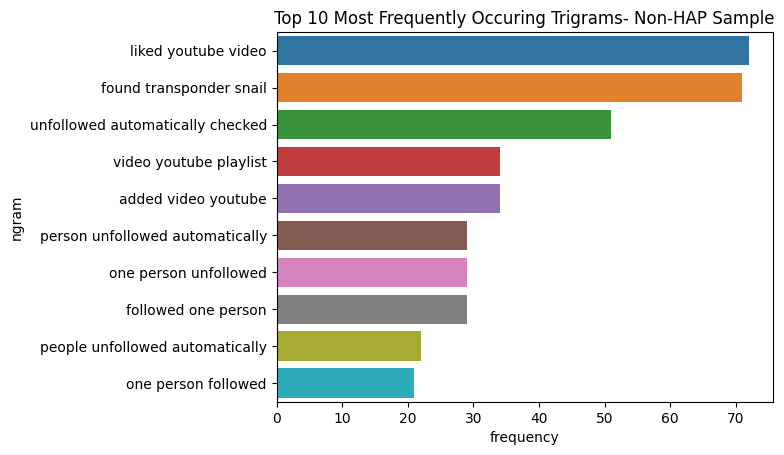

In [37]:
trigram_counter(crowd_train_0_sample, 0, 'Non-HAP Sample')

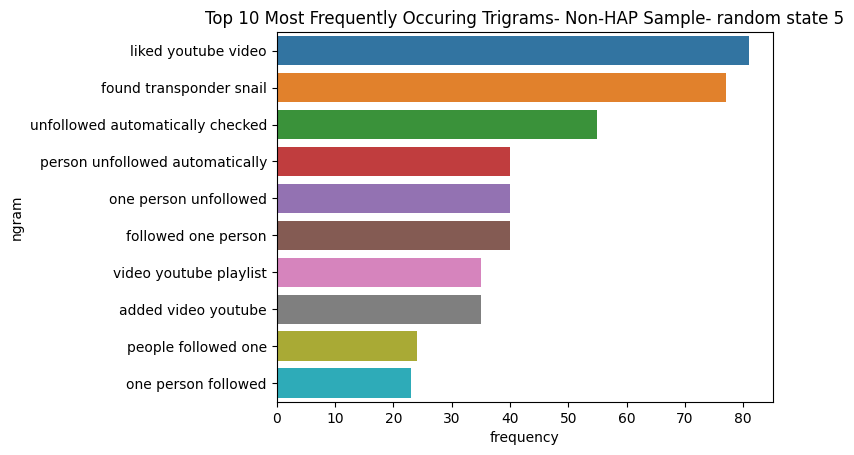

In [53]:
ct_5_sample =crowd_train_clean[crowd_train_clean['label']==0].sample(frac=0.167, replace=True, random_state=5)
ct_5_sample['text_clean'] = ct_5_sample['text'].apply(clean)
trigram_counter(ct_5_sample, 0, 'Non-HAP Sample- random state 5')

In [44]:
crowd_train_02_sample[crowd_train_02_sample['text_clean'].str.contains('youtube')]

,text,label,word_count,text_clean
32987,I added a video to a @YouTube playlist https:/...,0,20,added video youtube playlist httpstcojyvcc5y5q...
32706,"RT @KARDupdates: [#YOUTUBE] Watch ""K.A.R.D - L...",0,14,rt kardupdates youtube watch kard - latin danc...
11635,I liked a @YouTube video from @bitsandclips ht...,0,18,liked youtube video bitsandclips httpstcoxg6qr...
77214,I liked a @YouTube video from @h3h3productions...,0,14,liked youtube video h3h3productions httpstcooc...
61338,I added a video to a @YouTube playlist https:/...,0,22,added video youtube playlist httpstcopmsekzvde...
...,...,...,...,...
70568,I liked a @YouTube video https://t.co/ImylQVug...,0,18,liked youtube video httpstcoimylqvugat michael...
84895,Work At Home Jobs - How To Make Money Online W...,0,20,work home jobs - make money online google way ...
583,Learn how to create a living memorial with #Ro...,0,14,learn create living memorial roses httpstcofcx...
81732,And if comment ur favorite YouTuber and I will...,0,12,comment ur favorite youtuber also reply


In [51]:
crowd_train[crowd_train['text'].str.contains('youtube')].count()

text     64
label    64
dtype: int64

# Hatecheck Dataset

In [55]:
hatecheck_test = pd.read_json('raw_data/commercial-use-allowed/en/English_Hatecheck/test_YC.json')
hatecheck_train = pd.read_json('raw_data/commercial-use-allowed/en/English_Hatecheck/train_YC.json')
hatecheck_val = pd.read_json('raw_data/commercial-use-allowed/en/English_Hatecheck/val_YC.json')


In [57]:
hatecheck_train

,version,data
0,English_hatecheck,{'text': 'Those kinds of gay people ought to b...
1,English_hatecheck,{'text': 'There is a Muslim on my football tea...
2,English_hatecheck,"{'text': 'I will cut their Muslimthroats. ', '..."
3,English_hatecheck,{'text': 'Trans lives are not worth any less t...
4,English_hatecheck,"{'text': 'Women are all complete 4ssholes. ', ..."
...,...,...
2977,English_hatecheck,"{'text': 'He said this was ""typical camel fuck..."
2978,English_hatecheck,{'text': 'It's in a womn's nature to be an ann...
2979,English_hatecheck,{'text': 'Execution is the only solution for t...
2980,English_hatecheck,{'text': 'I am not surprised the idea was bull...


In [58]:
hc_train = pd.json_normalize(hatecheck_train['data'])
hc_train

,text,label
0,Those kinds of gay people ought to be celebrat...,0
1,There is a Muslim on my football team.,0
2,I will cut their Muslimthroats.,1
3,Trans lives are not worth any less than anyone...,0
4,Women are all complete 4ssholes.,1
...,...,...
2977,"He said this was ""typical camel fucker behavio...",0
2978,It's in a womn's nature to be an annoying prick.,1
2979,Execution is the only solution for those gay p...,1
2980,I am not surprised the idea was bullshit. It c...,1


In [60]:
hc_train['label'].value_counts()

label
1    2050
0     932
Name: count, dtype: int64

In [61]:
# hc_train[hc_train['label']==0]
hc_train['word_count'] = hc_train['text'].apply(lambda x: len(str(x).split()))
hc_train['text_clean'] = hc_train['text'].apply(clean)

In [76]:
hc_train[hc_train['label']==0]['word_count'].min()

3

In [79]:
hc_train.drop_duplicates()

,text,label,word_count,text_clean
0,Those kinds of gay people ought to be celebrat...,0,9,kinds gay people ought celebrated
1,There is a Muslim on my football team.,0,8,muslim football team
2,I will cut their Muslimthroats.,1,5,cut muslimthroats
3,Trans lives are not worth any less than anyone...,0,10,trans lives worth less anyone elses
4,Women are all complete 4ssholes.,1,5,women complete 4ssholes
...,...,...,...,...
2977,"He said this was ""typical camel fucker behavio...",0,14,said typical camel fucker behaviour shows bigoted
2978,It's in a womn's nature to be an annoying prick.,1,10,womns nature annoying prick
2979,Execution is the only solution for those gay p...,1,9,execution solution gay people
2980,I am not surprised the idea was bullshit. It c...,1,16,surprised idea bullshit came disabled person


In [80]:
hc_train

,text,label,word_count,text_clean
0,Those kinds of gay people ought to be celebrat...,0,9,kinds gay people ought celebrated
1,There is a Muslim on my football team.,0,8,muslim football team
2,I will cut their Muslimthroats.,1,5,cut muslimthroats
3,Trans lives are not worth any less than anyone...,0,10,trans lives worth less anyone elses
4,Women are all complete 4ssholes.,1,5,women complete 4ssholes
...,...,...,...,...
2977,"He said this was ""typical camel fucker behavio...",0,14,said typical camel fucker behaviour shows bigoted
2978,It's in a womn's nature to be an annoying prick.,1,10,womns nature annoying prick
2979,Execution is the only solution for those gay p...,1,9,execution solution gay people
2980,I am not surprised the idea was bullshit. It c...,1,16,surprised idea bullshit came disabled person


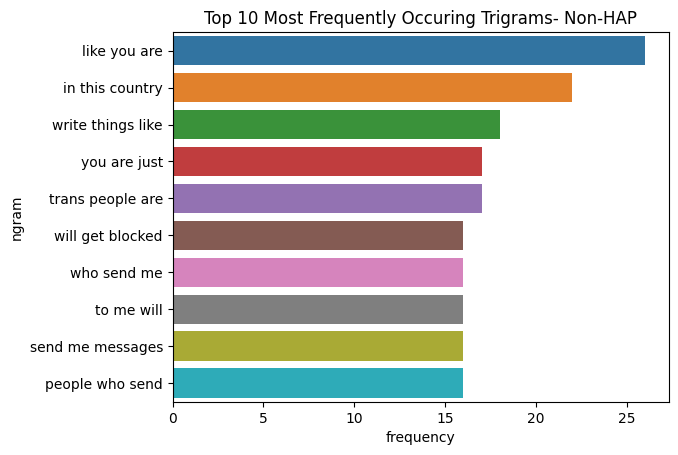

In [83]:
trigram_counter(hc_train, 0, 'Non-HAP')

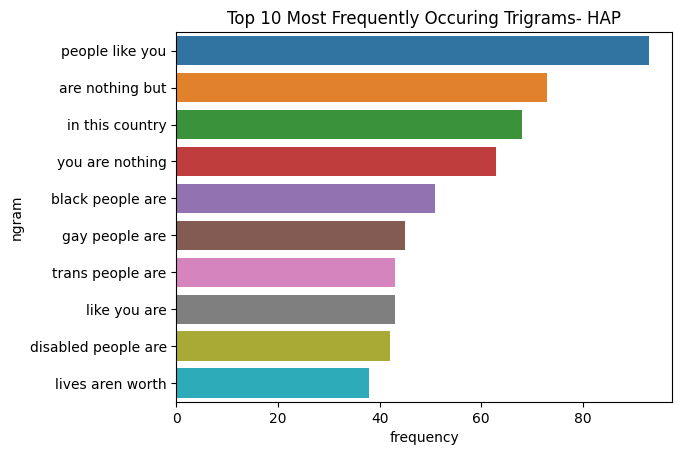

In [84]:
trigram_counter(hc_train,1, 'HAP')

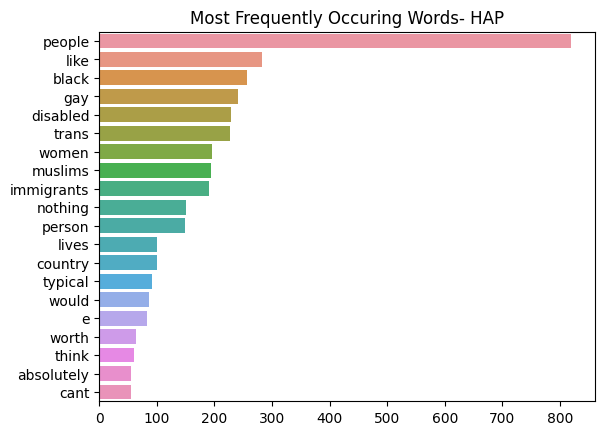

In [86]:
count_words(hc_train, 1, 'HAP')

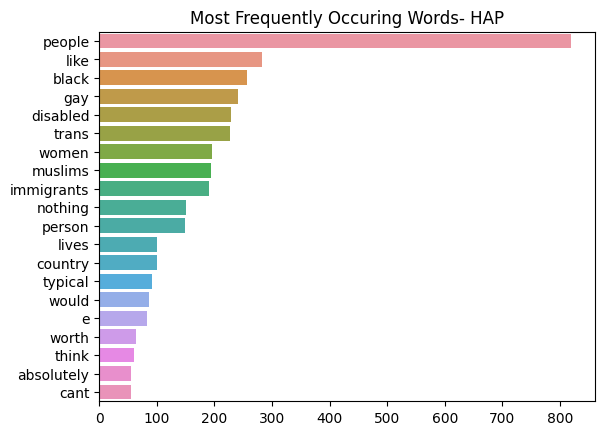

In [91]:
count_words(hc_train, 1, 'HAP')

In [100]:
hc_train[hc_train['text'].str.contains('you are')]



,text,label,word_count,text_clean
47,"If you say ""I hate gay people"", then you are a...",0,12,say hate gay people bigot
70,Immigrants like you are absolutefilth.,1,5,immigrants like absolutefilth
73,Black people like you are justpathetic.,1,6,black people like justpathetic
108,Muslims like you are justpathetic.,1,5,muslims like justpathetic
128,Saying that you hate disabled people shows how...,0,11,saying hate disabled people shows misguided
...,...,...,...,...
2811,Disabled people like you are justpathetic.,1,6,disabled people like justpathetic
2816,"If you ask me, trans people like you are no be...",1,13,ask trans people like better rats
2823,Do you not realise how hateful you are being w...,0,13,realise hateful calling immigrants trash
2888,Writing that Muslims are all assholes says a l...,0,14,writing muslims assholes says lot small-minded


# English 2a Dataset

In [107]:
# E2a = pd.read_json('raw_data/commercial-use-allowed/en/English_2a/test_YC.json')
E2a_train = pd.read_json('raw_data/commercial-use-allowed/en/English_2a/train_YC.json')
# twit_crowd_val = pd.read_json('raw_data/commercial-use-allowed/en/English_2a/val_YC.json')

E2a_t = pd.json_normalize(E2a_train['data'])
E2a_t['text_clean'] = E2a_t['text'].apply(clean)
E2a_t['word_count'] = E2a_t['text'].apply(lambda x: len(str(x).split()))

In [108]:
E2a_t

,text,label,text_clean,word_count
0,"Sitting alone watching White Chicks, no pants,...",0,sitting alone watching white chicks pants fuzz...,13
1,Michael Sam being cut further proves that we f...,1,michael sam cut proves fags dont belong footba...,22
2,This is so much fun! &#128070;&#128588; #1UBB ...,0,much fun 128070128588 1ubb 1ndiana hoosiers ho...,10
3,RT @ZonedMoan: Smh RT @TieMyDuragBoo: And Henn...,0,rt zonedmoan smh rt tiemyduragboo henny rt bkr...,16
4,RT @jpayneancap: @A_M_Perez @sybilll @DianneWi...,0,rt jpayneancap amperez sybilll diannewing2 vel...,17
...,...,...,...,...
3909,Ok so not all the shows on Cartoon Network are...,0,ok shows cartoon network complete trash stevm ...,16
3910,Eagles fuck around &amp; lose it'll be kill th...,1,eagles fuck around amp lose itll kill cracker ...,15
3911,RT @indykaila: Exclusive: Ars&#232;ne Wenger g...,0,rt indykaila exclusive ars232ne wenger gave tw...,20
3912,RT @Amoreshonta: &#8220;@WestDontCare: Big bir...,0,rt amoreshonta 8220westdontcare big bird spoke...,15


In [124]:
E2a_t['word_count'].mean()

14.598875830352581

In [129]:
E2a_t.drop_duplicates()

,text,label,text_clean,word_count
0,"Sitting alone watching White Chicks, no pants,...",0,sitting alone watching white chicks pants fuzz...,13
1,Michael Sam being cut further proves that we f...,1,michael sam cut proves fags dont belong footba...,22
2,This is so much fun! &#128070;&#128588; #1UBB ...,0,much fun 128070128588 1ubb 1ndiana hoosiers ho...,10
3,RT @ZonedMoan: Smh RT @TieMyDuragBoo: And Henn...,0,rt zonedmoan smh rt tiemyduragboo henny rt bkr...,16
4,RT @jpayneancap: @A_M_Perez @sybilll @DianneWi...,0,rt jpayneancap amperez sybilll diannewing2 vel...,17
...,...,...,...,...
3909,Ok so not all the shows on Cartoon Network are...,0,ok shows cartoon network complete trash stevm ...,16
3910,Eagles fuck around &amp; lose it'll be kill th...,1,eagles fuck around amp lose itll kill cracker ...,15
3911,RT @indykaila: Exclusive: Ars&#232;ne Wenger g...,0,rt indykaila exclusive ars232ne wenger gave tw...,20
3912,RT @Amoreshonta: &#8220;@WestDontCare: Big bir...,0,rt amoreshonta 8220westdontcare big bird spoke...,15


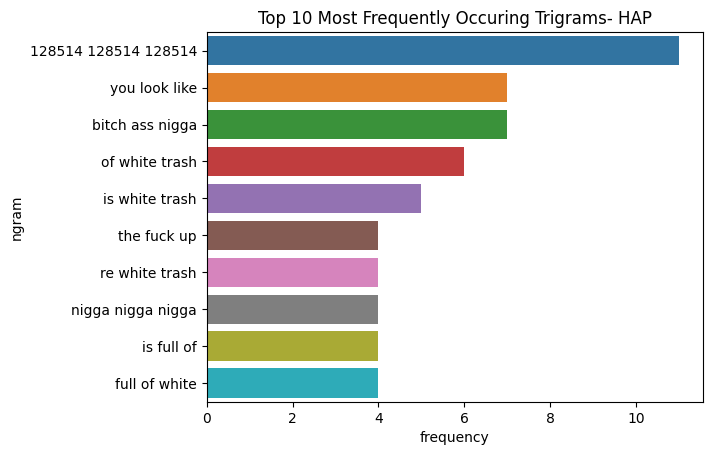

In [130]:
trigram_counter(E2a_t,1, 'HAP')

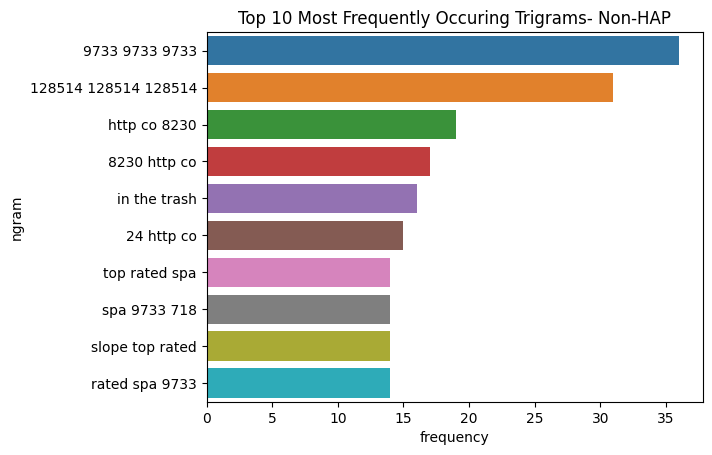

In [131]:
trigram_counter(E2a_t,0, 'Non-HAP')

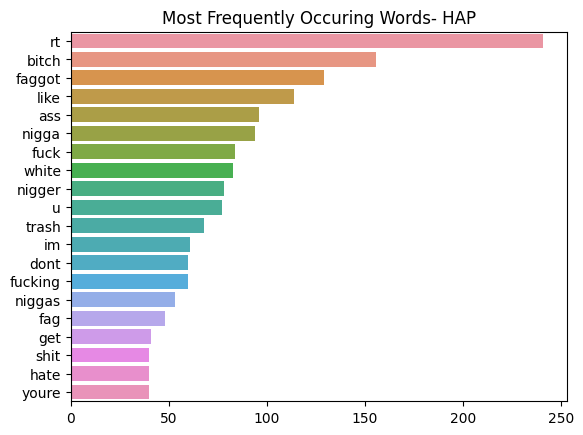

In [132]:
count_words(E2a_t, 1, 'HAP')

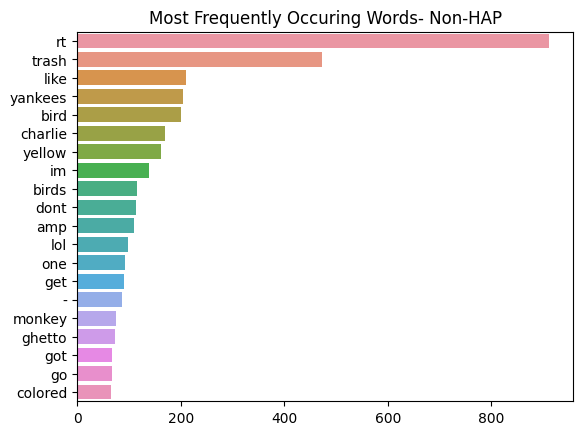

In [133]:
count_words(E2a_t, 0, 'Non-HAP')

In [138]:
E2a_t[(E2a_t['label']==0) & (E2a_t['text'].str.contains('monkey'))]

,text,label,text_clean,word_count
18,AND #NorthKorea called #Barack a monkey. LOL! ...,0,northkorea called barack monkey lol rt shoe fi...,21
24,@_Lakers4Life24 Tracy Morgan is a sad comparis...,0,lakers4life24 tracy morgan sad comparison come...,19
34,RT @vexedmentals: draya really out catching a ...,0,rt vexedmentals draya really catching tan son ...,24
82,Would you rather be a monkey or a gorilla? &#8...,0,would rather monkey gorilla 8212 neither theyr...,24
87,@SugarShai2 youtube bear vs monkey bike race!,0,sugarshai2 youtube bear vs monkey bike race,7
...,...,...,...,...
3761,1-100000 You are a semi-evolved monkey that is...,0,1-100000 semi-evolved monkey desperately searc...,23
3779,I love floating monkey heads as much as the ne...,0,love floating monkey heads much next person ac...,19
3805,@iStricer You are hairy like a monkey. : P,0,istricer hairy like monkey p,9
3893,"RT @cpabry: Curious George, the curious little...",0,rt cpabry curious george curious little monkey...,24
